In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rich.progress import track
from scipy.stats import uniform

from centrex_trajectories import (
    Coordinates,
    Gravity,
    Force,
    Velocities,
    propagate_trajectories,
    PropagationOptions,
)
from centrex_trajectories.particles import TlF
from centrex_trajectories.beamline_objects import (
    CircularAperture,
    ElectrostaticQuadrupoleLens,
    Section,
    Bore,
)
from centrex_trajectories.visualization import plot_beamline


In [2]:
plt.rcParams.update({"font.size": 14})

In [13]:
in_to_m = 2.54e-2

n_trajectories = 1_000_000

options = PropagationOptions(verbose=False, n_cores=8)
gravity = Gravity(0, -9.81, 0)
particle = TlF()

eql_start = 1
eql_length = 0.6
eql_voltage = 30_000
eql_radius = 1.75 / 2 * in_to_m

v_forward = 200  # m/s
sigma_v_forward = 13  # m/s
sigma_v_transverse = 57  # m/s


In [14]:
pre_eql = Section(
    name="Pre-Lens",
    objects=[CircularAperture(x=0, y=0, z=eql_start - 1e-3, r=eql_radius)],
    start=0,
    stop=eql_start - 5e-4,
    save_collisions=False,
)
eql = ElectrostaticQuadrupoleLens(
    name="EQL",
    objects=[Bore(x=0, y=0, z=eql_start, length=eql_length, radius=eql_radius)],
    start=eql_start,
    stop=eql_start + eql_length,
    V=eql_voltage,
    R=eql_radius,
)

det = Section(
    name="DET",
    objects=[],
    start=eql_start + eql_length + 5e-4,
    stop=5,
    save_collisions=True,
)

sections = [pre_eql, eql, det]


In [15]:
origin = Coordinates(
    x=np.zeros(n_trajectories), y=np.zeros(n_trajectories), z=np.zeros(n_trajectories)
)
velocities = Velocities(
    vx=np.random.randn(n_trajectories) * sigma_v_transverse,
    vy=np.random.randn(n_trajectories) * sigma_v_transverse,
    vz=v_forward * np.ones(n_trajectories),
)


In [16]:
section_data, trajectories = propagate_trajectories(
    sections,
    origin,
    velocities,
    particle,
    force=Force(0, 0, 0),
    options=options,
)


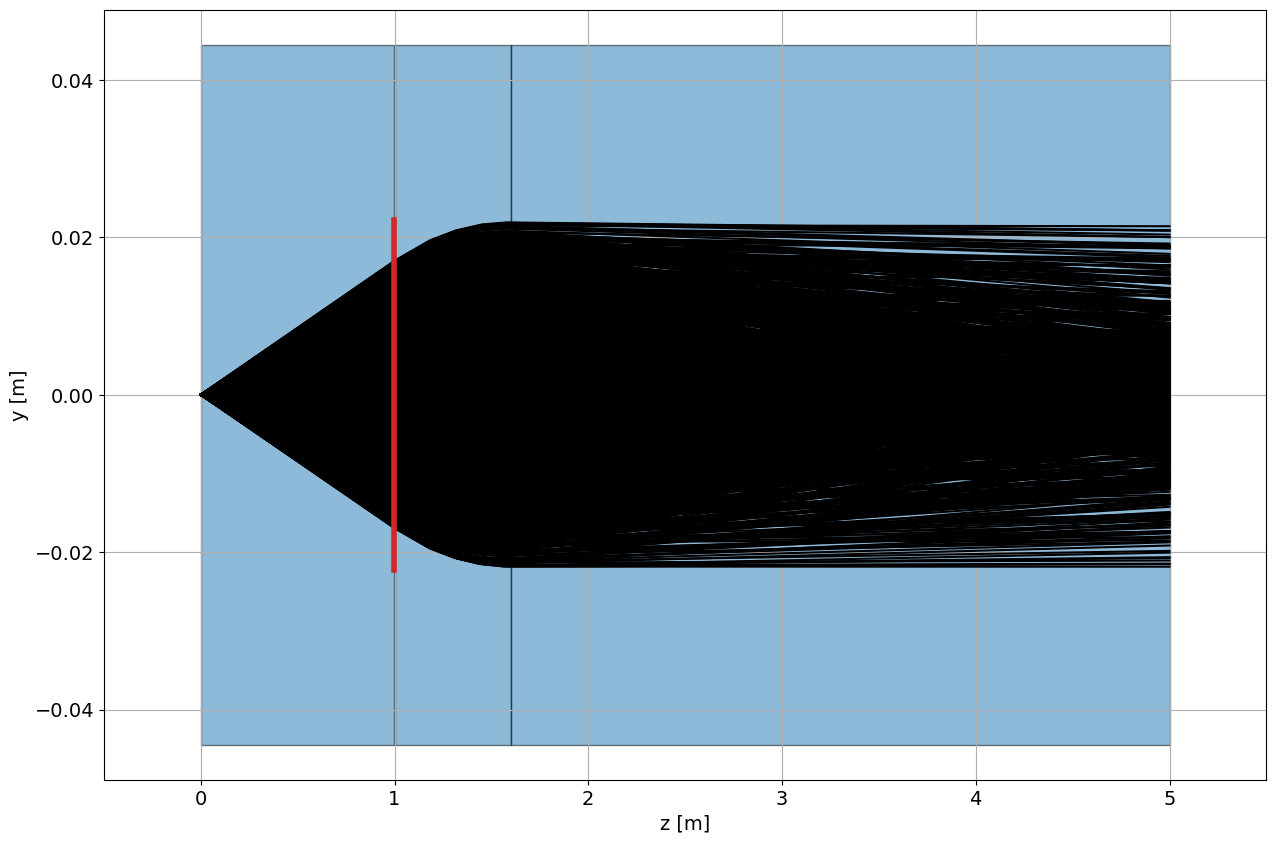

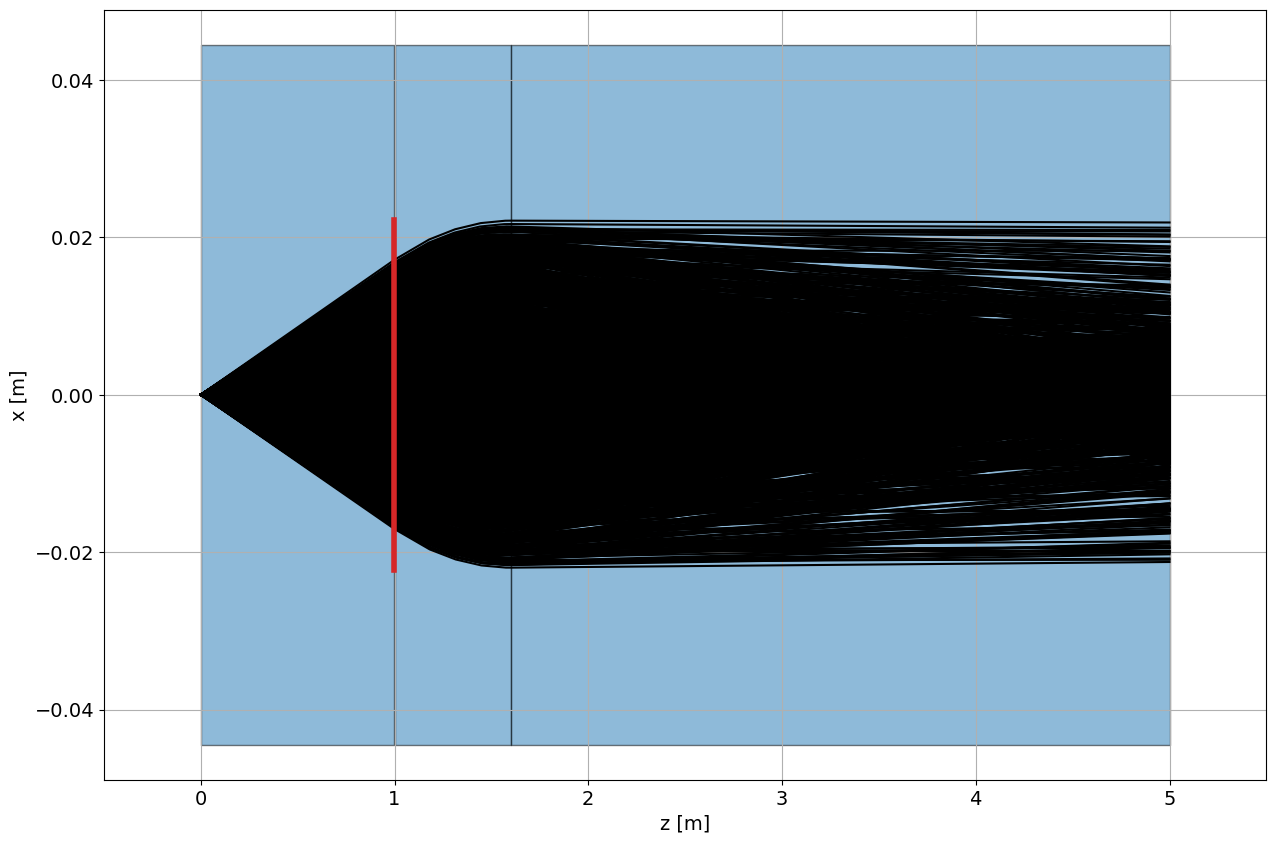

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
for idt, traj in trajectories.items():
    ax.plot(traj.z, traj.y, color="k")

plot_beamline(sections, ax=ax)

ax.set_xlabel("z [m]")
ax.set_ylabel("y [m]")

ax.grid(True)

fig, ax = plt.subplots(figsize=(15, 10))
for idt, traj in trajectories.items():
    ax.plot(traj.z, traj.x, color="k")

plot_beamline(sections, ax=ax)

ax.set_xlabel("z [m]")
ax.set_ylabel("x [m]")

ax.grid(True)
